<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
#pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [3]:
df['clase_tipo']

0        Vehículos Especiales
1        Vehículos Especiales
2        Vehículos Especiales
3        Vehículos Especiales
4             Coches Medianos
                 ...         
36786         Coches pequeños
36787         Coches pequeños
36788         Coches pequeños
36789         Coches pequeños
36790         Coches pequeños
Name: clase_tipo, Length: 36791, dtype: object

En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


# Parte 1

In [4]:
#Dataframe con variables numéricas
df_num = df.select_dtypes(include=np.number).copy() 

In [5]:
#Reemplazo de valores nan por promedio
for col in df_num.columns:
    prom = df_num[col].mean()
    df_num.loc[df_num[col].isnull(),col] = prom
df_num

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984.0,2.5,4.0,522.764706,0.222671
1,1984.0,4.2,6.0,683.615385,0.291185
2,1985.0,2.5,4.0,555.437500,0.236588
3,1985.0,4.2,6.0,683.615385,0.291185
4,1987.0,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015.0,1.0,3.0,244.000000,0.105150
36787,2016.0,0.9,3.0,246.000000,0.108155
36788,2016.0,0.9,3.0,255.000000,0.111336
36789,2017.0,0.9,3.0,248.000000,0.108155


In [6]:
#Reescalamaiento mediante MinMax
scaler = MinMaxScaler()
for col in df_num.columns:
    df_num[[col]] = scaler.fit_transform(df_num[[col]])
df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


# Parte 2

In [7]:
#Dataframe con variables categóricas
df_str = df.select_dtypes(include=object).copy()
df_str

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto
...,...,...,...,...,...,...,...
36786,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36787,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36788,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo
36789,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo


In [8]:
#Conversión de variables categóricas a numéricas con Get dummies
df_str_numerico = pd.get_dummies(df_str)
df_str_numerico

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## Explicación get_dummies
La codificación separa cada valor uníco de las columnas con variables categóricas y crea una nueva columna con cada valor único, luego para cada fila asigna el valor 1 en cada columna creada siesque esa fila contenía el valor único de cada columna y el valor 0 en caso contrario.

# Parte 3

In [9]:
#Concatenación de los Dataframes creados
df_procesado = pd.concat([df_num,df_str_numerico],axis=1, sort=False)
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

# Parte 1

In [10]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

KMeans()

# Parte 2

In [11]:
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [12]:
# etiquetar los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df_procesado = pd.DataFrame(centroids)
centroids_df_procesado["cluster"] = [1,2,3,4,5,6,7,8]
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,6
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


# Parte 3

In [13]:
#Promedio de las variables numéricas
df_procesado.groupby('cluster').mean()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.695702,0.179404,0.150728,0.240178,0.156814,0.000000,0.110189,0.027742,0.181747,0.546539,...,0.000000,0.000000,0.000259,0.000000,0.999741,0.000000,0.017371,0.000519,0.000000,0.982110
1,0.409092,0.333846,0.258067,0.354202,0.281278,0.178502,0.083925,0.093447,0.135733,0.181892,...,0.000000,0.031633,0.963202,0.000000,0.005165,0.001453,0.000646,0.997902,0.000000,0.000000
2,0.588065,0.362121,0.299467,0.354068,0.282213,0.001512,0.083921,0.086442,0.190020,0.561240,...,0.000504,0.027470,0.972026,0.000000,0.000000,0.023185,0.000000,0.976815,0.000000,0.000000
3,0.524300,0.250770,0.195525,0.304420,0.226575,0.062288,0.095063,0.045696,0.153543,0.448524,...,0.000000,0.976880,0.000000,0.000000,0.023120,0.000000,0.992248,0.006392,0.000000,0.001360
4,0.313071,0.548444,0.383841,0.507836,0.453114,0.423473,0.001971,0.016203,0.017955,0.031531,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
5,0.591198,0.624251,0.484308,0.504638,0.442795,0.172414,0.006974,0.070128,0.074777,0.331654,...,0.118946,0.000000,0.025184,0.855870,0.000000,0.002712,0.000000,0.000775,0.996513,0.000000
6,0.438404,0.159576,0.141184,0.242287,0.156504,0.016407,0.124861,0.006396,0.092881,0.709956,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002781,0.001390,0.000000,0.995829
7,0.476486,0.450899,0.327092,0.409930,0.343238,0.306227,0.017120,0.041515,0.048577,0.148513,...,0.958485,0.000000,0.040659,0.000856,0.000000,0.995934,0.000642,0.000642,0.002782,0.000000


In [32]:
#Moda de las variables numéricas
df_procesado.groupby('cluster').agg(lambda x : x.value_counts().index[0])

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0.823529,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0.705882,0.717949,0.428571,0.488312,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [35]:
# implementación de la regla del codo
Nc = [5, 10, 20, 30,50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,118371.222000
1,10,84081.093527
2,20,67691.636431
3,30,57236.223944
4,50,44612.885101
5,75,36749.796835
6,100,30991.791765
7,200,18077.200218
8,300,11421.732786


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

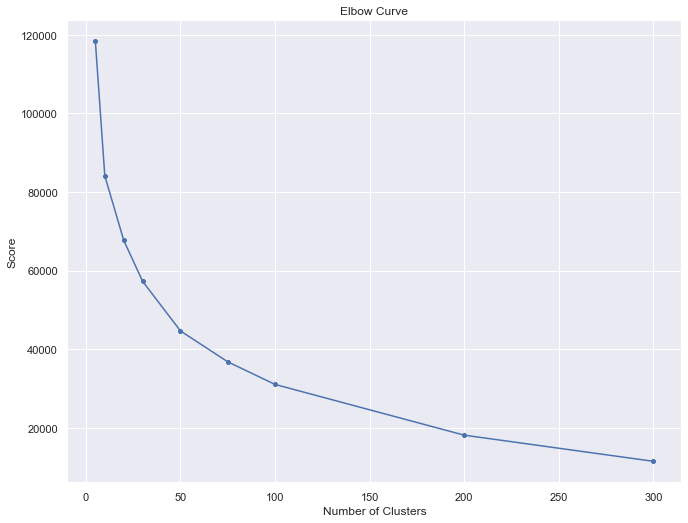

In [37]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

## Conclusiones

Al observar el gráfico es díficl notar un cambió brusco en la pendiente de la curva en cada punto. Aun así, el mayor cambio que puedo observar es el punto de 50 clusters (se nota una pequeña punta mayor a en el punto 100 y 10) y por lo tanto elegiría esta cantidad. Debido a la separación en la sequencia de los clusters testeados, podría pasar que si hubieran más casos entre los 100 y 300 clusters se notarían quizás más puntas y mi elección de usar 50 clusters cambiaría.